In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

orgs_int_sizes = [103,  23, 18, 10, 9, 7, 7, 7, 7, 6, 6, 5, 5, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tennis_int_sizes = [23, 22, 11, 10, 9, 9, 7, 5, 5, 4, 4, 3, 3, 1, 1]
covid_int_sizes = [281, 259, 198, 179, 140, 69, 64, 57, 54, 50, 46, 43, 41, 31, 28, 26, 23, 22, 18, 17, 17, 17, 12, 12, 11, 11, 10, 8, 7, 7, 5, 1]
movies_int_sizes = [1191, 809, 762, 220, 208, 91, 75, 68, 67, 57, 54, 48, 34, 21, 20, 16, 15, 15, 14, 13, 12, 10, 10, 8, 8, 6, 6, 4, 4, 4, 3, 3, 1, 1, 1, 1, 1]

movies_set_sizes = [1603, 1200, 503, 283, 251, 143]
covid_set_sizes = [1531, 1051, 897, 363, 350, 148]
tennis_set_sizes = [58, 56, 52, 42]
orgs_set_sizes = [202, 200, 195, 193, 183, 33]

# Degrees are in order of intersection size largest to smallest, so they line up with above data
movies_int_degrees = [1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1,2,1,2,2,2,3,3,3,2,2,3,3,3,3,2,3,2,3,3,3,4,2,3,4,4,3]
covid_int_degrees = [2,3,1,2,1,4,3,1,3,5,3,2,4,3,2,4,6,3,5,5,4,4,1,3,4,1,2,5,4,2,1,2]
tennis_int_degrees = [1,1,1,3,4,1,3,2,2,2,2,3,2,3,2]
orgs_int_degrees = [5,6,0,4,1,3,2,1,2,4,3,1,1,3,3,4]

colors = sns.color_palette("husl", 4)
marks = ['o', 's', 'D', '^']

# Functions for categorizing data bounds

In [33]:
from typing import List, Tuple

def set_size_bounds(sizes: List[int]) -> List[int]:
  """
  Determines the categorical bounds for set sizes: deviating by > 10% and > 30% from the max size
  Returns:
    - Lower boundary between "diverging a lot " and "moderately diverging"
    - Lower boundary between "moderately diverging" and "roughly equal"
    - Upper boundary between "roughly equal" and "moderately diverging"
    - Upper boundary between "moderately diverging" and "diverging a lot"
  """
  max = max(sizes)
  return [max * .70, max * .90, max * 1.10, max * 1.30]

def int_degree_bounds(degrees: List[int]) -> List[int]:
  """
  Determines boundaries for intersection degree labels
  Returns:
    - Independent set boundary (1)
    - Low-degree boundary (3)
    - Medium-degree boundary (3 - n/2)
    - High-degree boundary (n/2)
  (where n is max degree)
  """
  n = max(degrees)
  return [1, 3, n//2, n]

def int_size_bounds(sizes: List[int]) -> List[int]:
  """
  Determines boundaries for intersection size labels
  Returns:
    - Small intersection boundary (median of sizes)
    - Medium intersection boundary (median + 1.5 * IQR)
    - Large intersection boundary (less than max)
    - Largest intersection boundary (max)
  Where IQR is interquartile range
  """
  q1 = np.percentile(sizes, 25)
  q3 = np.percentile(sizes, 75)
  iqr = q3 - q1
  return [np.median(sizes), np.median(sizes) + 1.5 * iqr, max(sizes) - 1, max(sizes)]

In [38]:
def categorical_strip(
  data: List[int], 
  bounds: List[int], 
  names: List[str], 
  colors: List[str], 
  markers: List[str], 
  xlabel: str,
  title: str,
  xlog: bool,
) -> None:
    """
    Plots sequential numerical data sorted into categories.

    Parameters:
    - data: List of numerical data points.
    - bounds: List of ints representing the boundaries between each category.
      Each boundary is the inclusive upper bound of the previous category 
      and the exclusive lower bound of the current category.
    - colors: List of colors corresponding to each category.
    - markers: List of marker types corresponding to each category.
    - xlabel: Label for the x axis
    - xlog: If true, uses a logarithmic scale for the x axis

    Returns:
    - A plot of the data.
    """
    
    # Plot each category separately
    plt.figure(figsize=(10, 2))
    
    for i, bound in enumerate(bounds):
        # Select data points within the current category bounds
        if i == 0:
            lower = 0
        else:
            lower = bounds[i-1]
        category_data = [point for point in data if lower < point <= bound]
        
        if len(category_data) == 0:
          continue
        
        # Plot the data points for the current category
        plt.plot(category_data, 
                np.zeros_like(category_data) + i, 
                linestyle='None', 
                marker=markers[i], 
                color=colors[i], 
                label=f'{names[i]} ({len(category_data)})', 
                markersize=6,
                markeredgecolor='black',
                markeredgewidth=0.8,
        )
        
        # Draw vertical lines at the boundaries and shade the areas
        plt.axvline(x=lower, color=colors[i], linestyle='-', linewidth=1)
        plt.axvline(x=bound, color=colors[i], linestyle='-', linewidth=1)
        plt.axvspan(lower, bound, facecolor=colors[i], alpha=0.3)

    if xlog:
      plt.xscale('log')
    
    # Customizations
    plt.xlim((min(data), round(max(data) * 1.05)))
    plt.yticks(range(len(bounds)), names)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(axis='x', linestyle='--', alpha=1)
    plt.show()

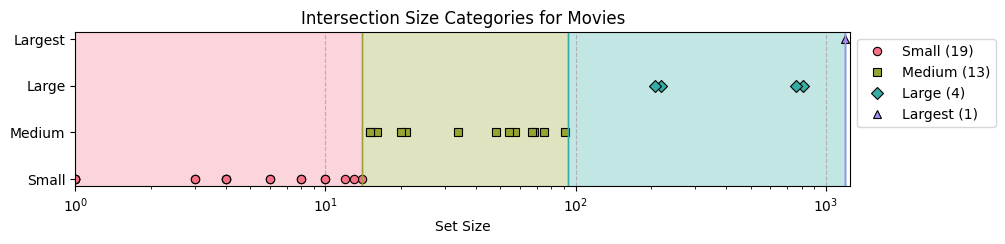

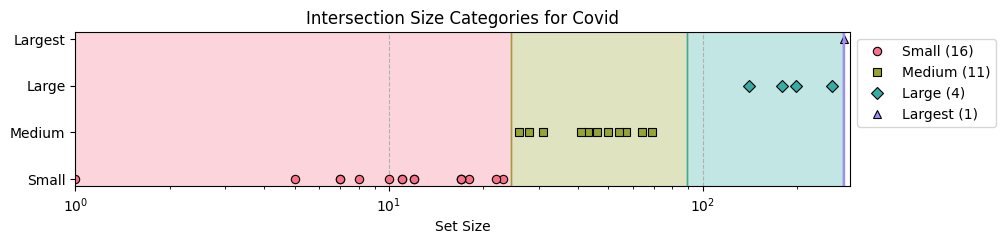

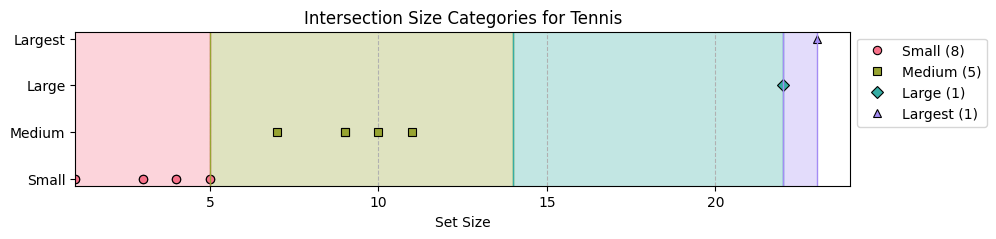

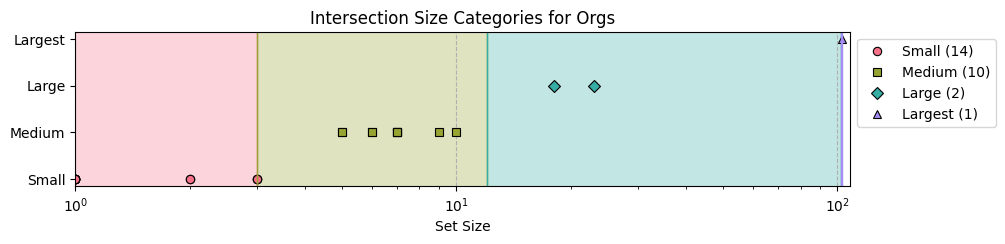

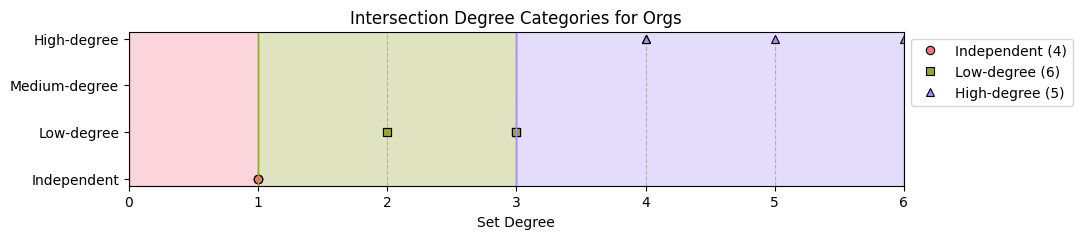

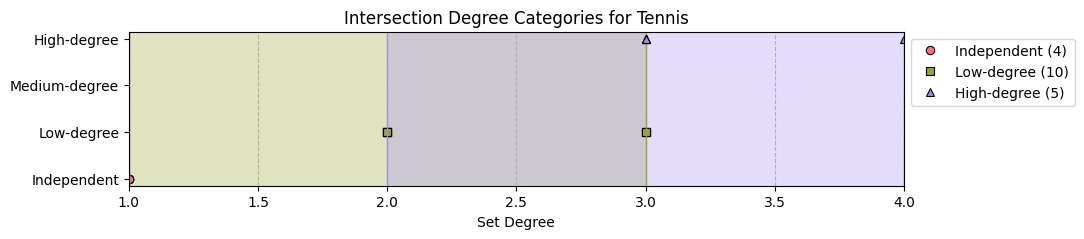

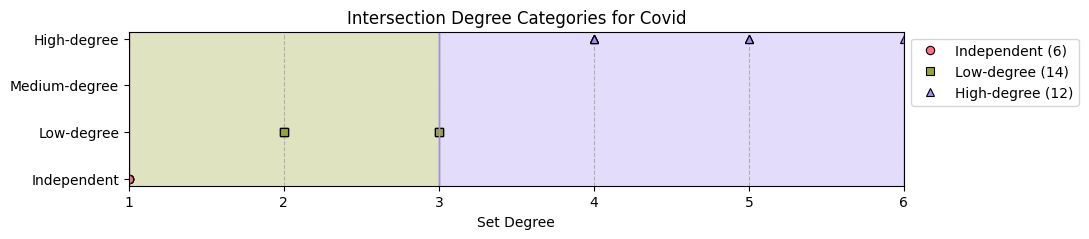

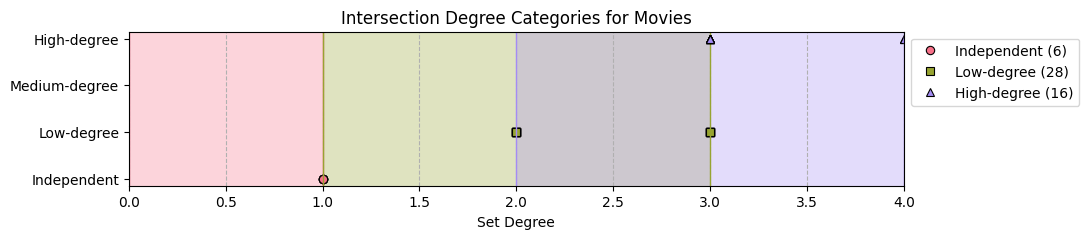

In [39]:
int_size_labels = ['Small', 'Medium', 'Large', 'Largest']
# Intersection size sorting
categorical_strip(
  movies_int_sizes, 
  int_size_bounds(movies_int_sizes), 
  int_size_labels, 
  colors, 
  marks, 
  'Set Size', 
  'Intersection Size Categories for Movies', 
  True
)
categorical_strip(
  covid_int_sizes, 
  int_size_bounds(covid_int_sizes), 
  int_size_labels, 
  colors, 
  marks, 
  'Set Size', 
  'Intersection Size Categories for Covid', 
  True
)
categorical_strip(
  tennis_int_sizes, 
  int_size_bounds(tennis_int_sizes), 
  int_size_labels, 
  colors, 
  marks, 
  'Set Size', 
  'Intersection Size Categories for Tennis', 
  False
)
categorical_strip(
  orgs_int_sizes, 
  int_size_bounds(orgs_int_sizes), 
  int_size_labels, 
  colors, 
  marks, 
  'Set Size', 
  'Intersection Size Categories for Orgs', 
  True
)
int_degree_labels = ['Independent', 'Low-degree', 'Medium-degree', 'High-degree']
# Intersection degree bounds
categorical_strip(
  orgs_int_degrees,
  int_degree_bounds(orgs_int_degrees),
  int_degree_labels,
  colors,
  marks,
  'Set Degree',
  'Intersection Degree Categories for Orgs',
  False
)
categorical_strip(
  tennis_int_degrees,
  int_degree_bounds(tennis_int_degrees),
  int_degree_labels,
  colors,
  marks,
  'Set Degree',
  'Intersection Degree Categories for Tennis',
  False
)
categorical_strip(
  covid_int_degrees,
  int_degree_bounds(covid_int_degrees),
  int_degree_labels,
  colors,
  marks,
  'Set Degree',
  'Intersection Degree Categories for Covid',
  False
)
categorical_strip(
  movies_int_degrees,
  int_degree_bounds(movies_int_degrees),
  int_degree_labels,
  colors,
  marks,
  'Set Degree',
  'Intersection Degree Categories for Movies',
  False
)